In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
df = pd.read_csv(url)


In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.nunique().to_frame(name = "# of unique values")

,# of unique values
CustomerID,200
Genre,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [7]:
df.apply(pd.unique).to_frame(name = 'unique values')

,unique values
CustomerID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Genre,"[Male, Female]"
Age,"[19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2..."
Annual Income (k$),"[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2..."
Spending Score (1-100),"[39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,..."


In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Factor 01: Age
### Relationship between the age and the score

In [9]:
bins = np.linspace(min(df['Age']), max(df['Age']), 4)

In [10]:
group_names = ['Young', 'Adult', 'Elder']

In [11]:
df['Age-binned'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest= True)

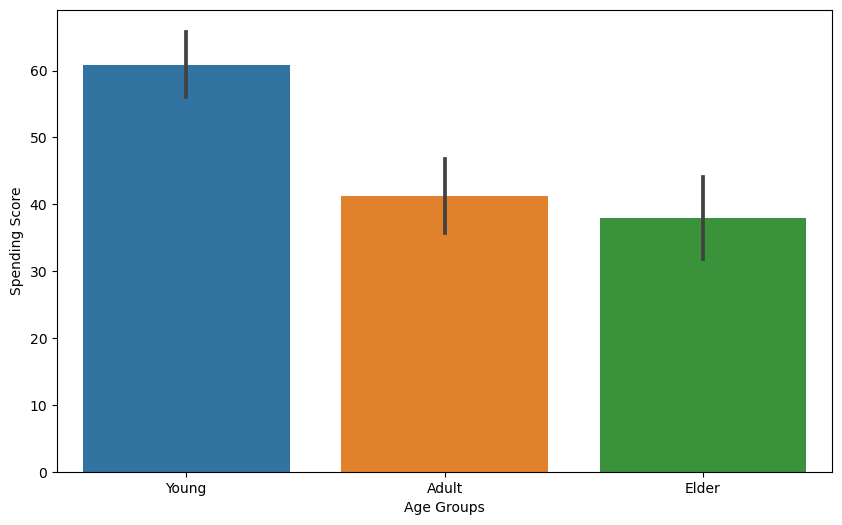

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'Age-binned', y= 'Spending Score (1-100)', data = df)
plt.xlabel('Age Groups'), plt.ylabel('Spending Score')
plt.show()

<Figure size 1000x600 with 0 Axes>

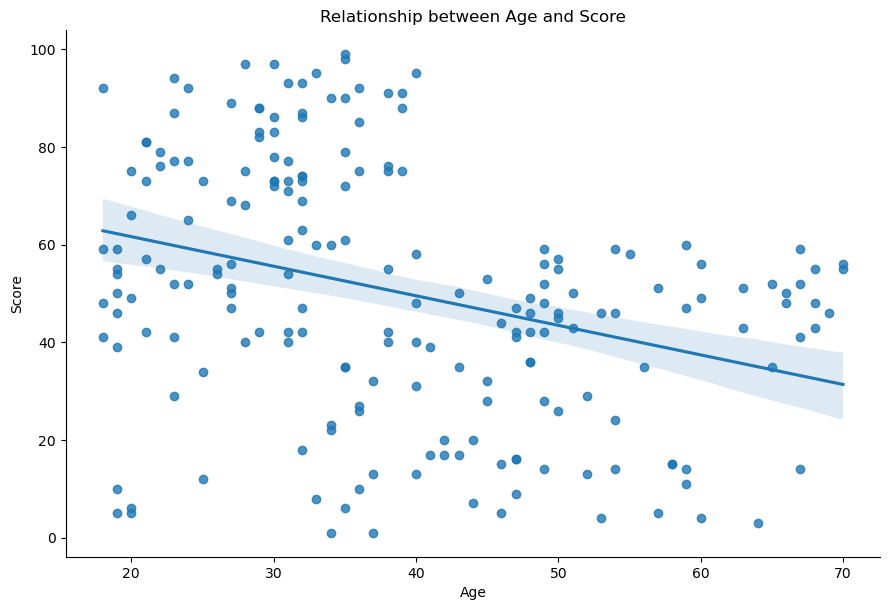

In [13]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Age', y='Spending Score (1-100)', data=df, height=6, aspect=1.5)
plt.xlabel('Age')
plt.ylabel('Score')
plt.title('Relationship between Age and Score')
plt.show()

## Factor 02: Genre
### Relationship between the genre and the score

- Trnasform Genre into numiric values (Label Encodein)
* Male: 1, Female: 0

In [14]:
label_encoder = preprocessing.LabelEncoder()
df['Genre-encodes'] = label_encoder.fit_transform(df['Genre'])

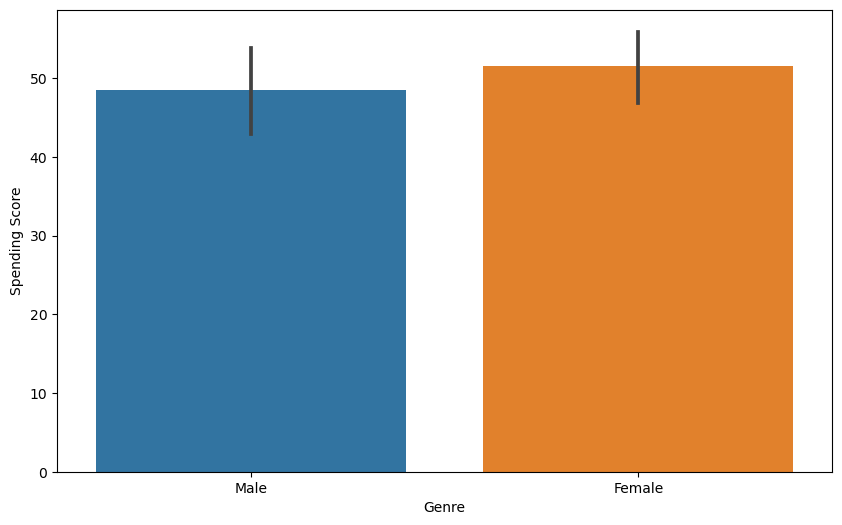

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'Genre', y= 'Spending Score (1-100)', data = df)
plt.xlabel('Genre'), plt.ylabel('Spending Score')
plt.show()

## Factor 03: Annual Income
### Relationship between the annual income and the score

In [16]:
bins_income = np.linspace(min(df['Annual Income (k$)']), max(df['Annual Income (k$)']), 4)
group_names_income = ['Low', 'Medium', 'High']
df['Income-binned'] = pd.cut(df['Annual Income (k$)'], bins_income, labels=group_names_income, include_lowest=True)

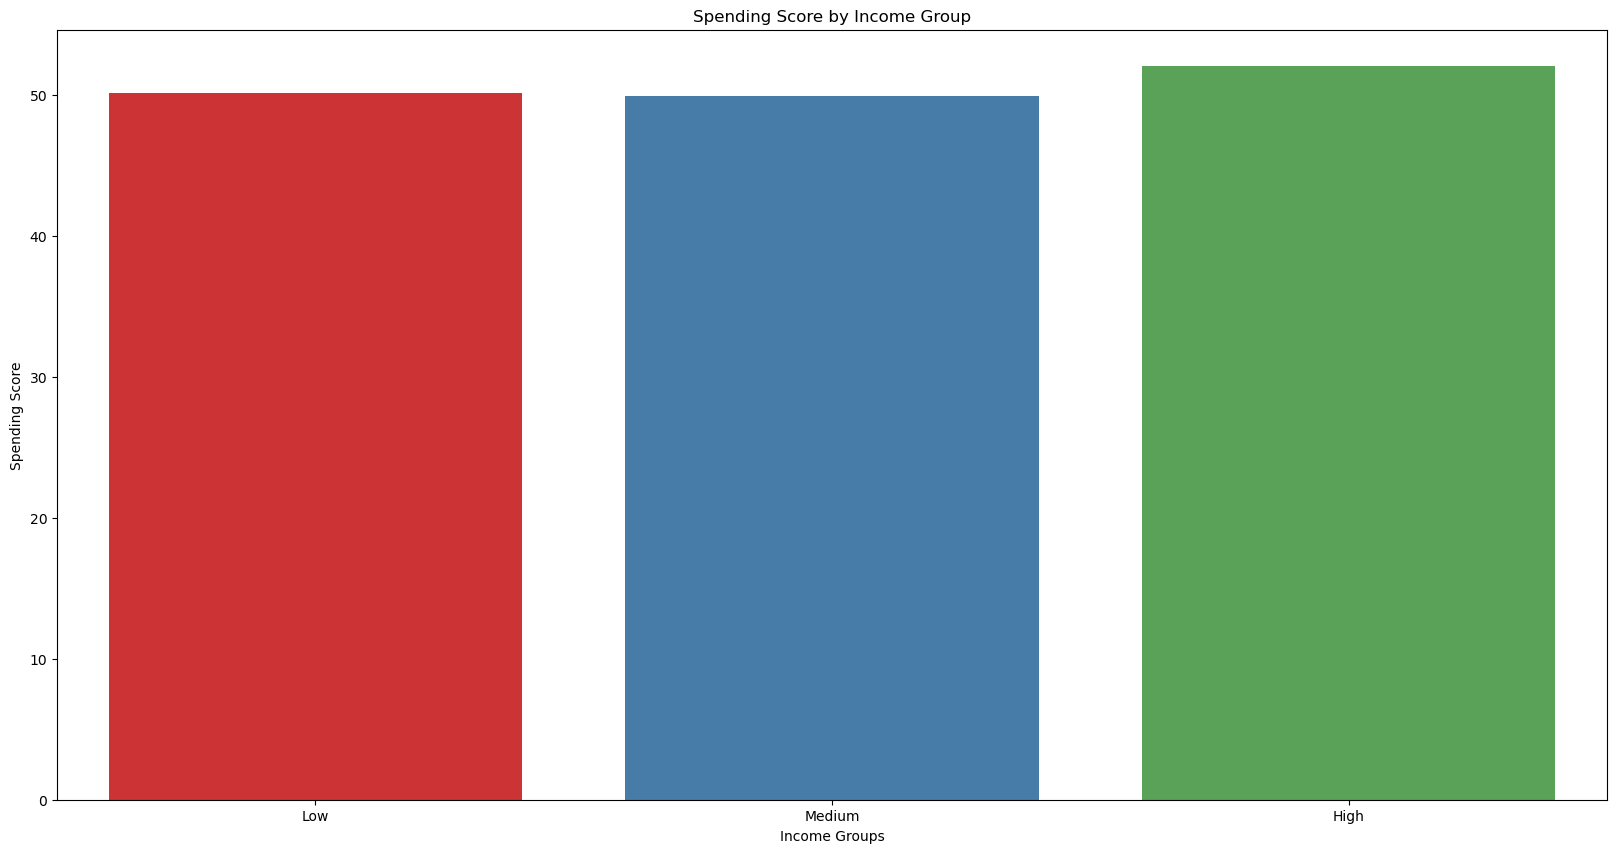

In [17]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Income-binned', y='Spending Score (1-100)', data=df, ci=None, palette='Set1')
plt.xlabel('Income Groups'), plt.ylabel('Spending Score')
plt.title('Spending Score by Income Group')
plt.show()

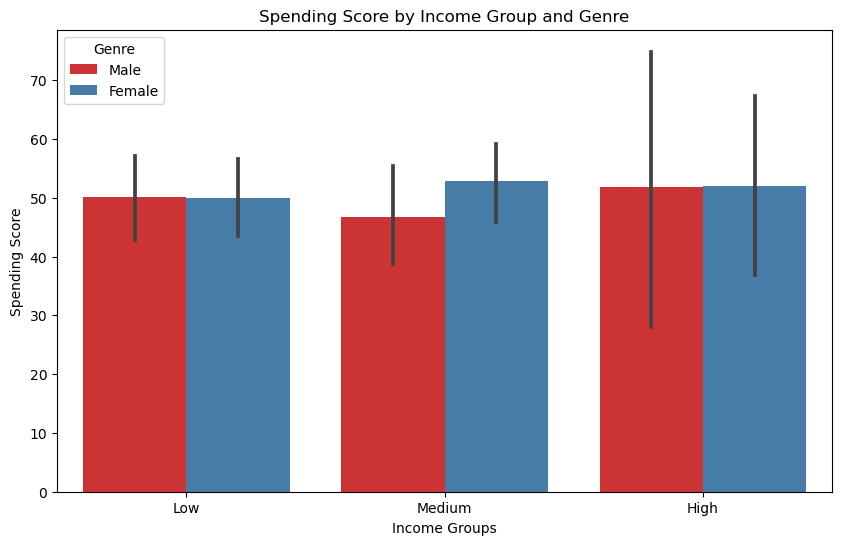

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Income-binned', y= 'Spending Score (1-100)', hue='Genre', data=df, palette='Set1')
plt.xlabel('Income Groups')
plt.ylabel('Spending Score')
plt.title('Spending Score by Income Group and Genre')
plt.show()

<Figure size 1000x600 with 0 Axes>

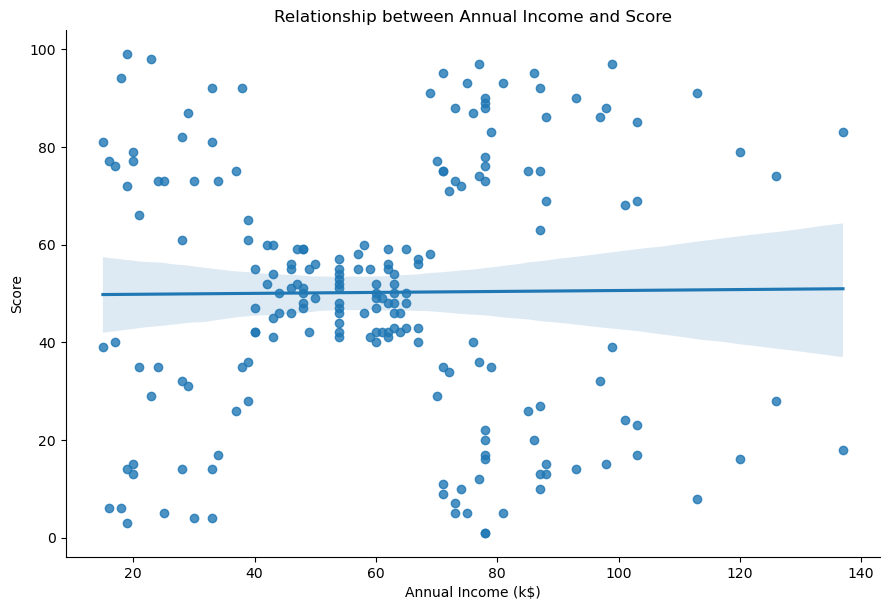

In [19]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, height=6, aspect=1.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Score')
plt.title('Relationship between Annual Income and Score')
plt.show()

<Figure size 1000x600 with 0 Axes>

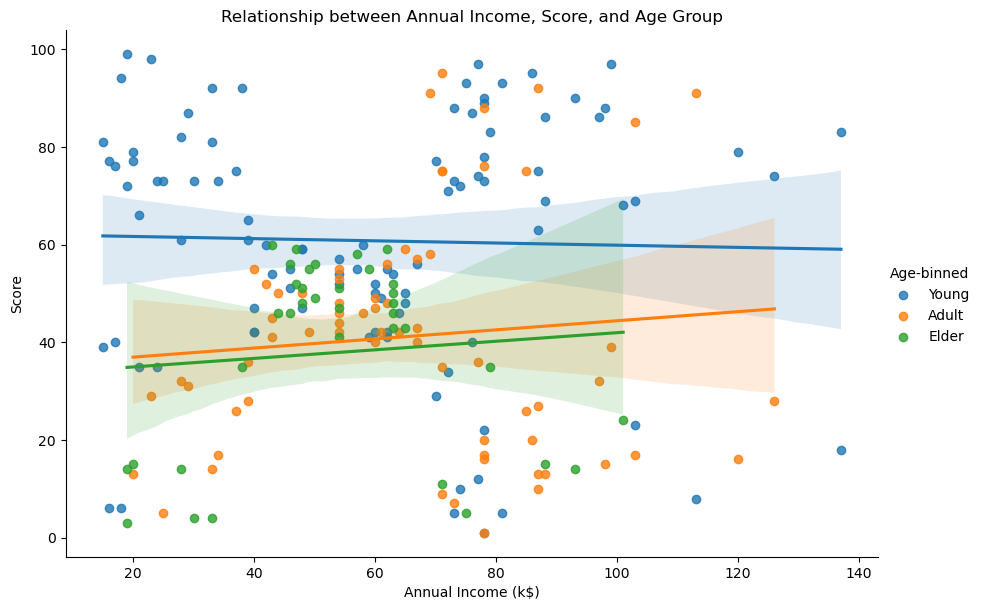

In [20]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Age-binned', data=df, height=6, aspect=1.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Score')
plt.title('Relationship between Annual Income, Score, and Age Group')
plt.show()

In [21]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age-binned,Genre-encodes,Income-binned
0,1,Male,19,15,39,Young,1,Low
1,2,Male,21,15,81,Young,1,Low
2,3,Female,20,16,6,Young,0,Low
3,4,Female,23,16,77,Young,0,Low
4,5,Female,31,17,40,Young,0,Low
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,Young,0,High
196,197,Female,45,126,28,Adult,0,High
197,198,Male,32,126,74,Young,1,High
198,199,Male,32,137,18,Young,1,High


In [22]:
df_numiric = df.drop(['Income-binned', 'Age-binned', 'Genre'], axis = 1)

In [23]:
df_numiric

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre-encodes
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


## Normlizeiation

In [24]:
X = df_numiric.values[:, 1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

## Modeling

### Annual Income and Spending Score

#### The Elbow Method

In [25]:
X_frame = pd.DataFrame(X)

In [26]:
wcss = []
for i in range(1, 12):
    k_means = KMeans(n_clusters = i)
    k_means.fit(X_frame[[1, 2]])
    wcss_iter = k_means.inertia_
    wcss.append(wcss_iter)

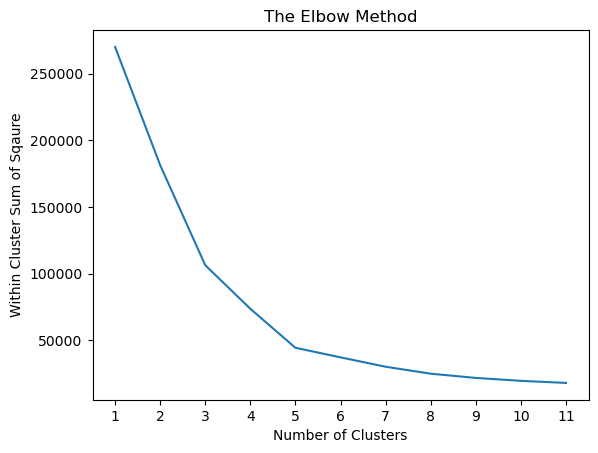

In [27]:
num_clusters = range(1, 12)
plt.plot(num_clusters, wcss)
plt.xticks(num_clusters)
plt.xlabel("Number of Clusters"), plt.ylabel("Within Cluster Sum of Sqaure")
plt.title("The Elbow Method")
plt.show()

In [28]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)

KMeans(n_clusters=5, n_init=12)

In [29]:
labels = k_means.labels_
print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [30]:
df_numiric["Clus_km"] = labels
df_numiric.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre-encodes,Clus_km
0,1,19,15,39,1,4
1,2,21,15,81,1,2
2,3,20,16,6,0,4
3,4,23,16,77,0,2
4,5,31,17,40,0,4


In [31]:
df_numiric.groupby('Clus_km').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre-encodes
Clus_km,,,,,
0,86.265823,43.088608,55.291139,49.569620,0.417722
1,163.500000,40.666667,87.750000,17.583333,0.527778
2,24.000000,25.521739,26.304348,78.565217,0.391304
3,162.000000,32.692308,86.538462,82.128205,0.461538
4,23.000000,45.217391,26.304348,20.913043,0.391304


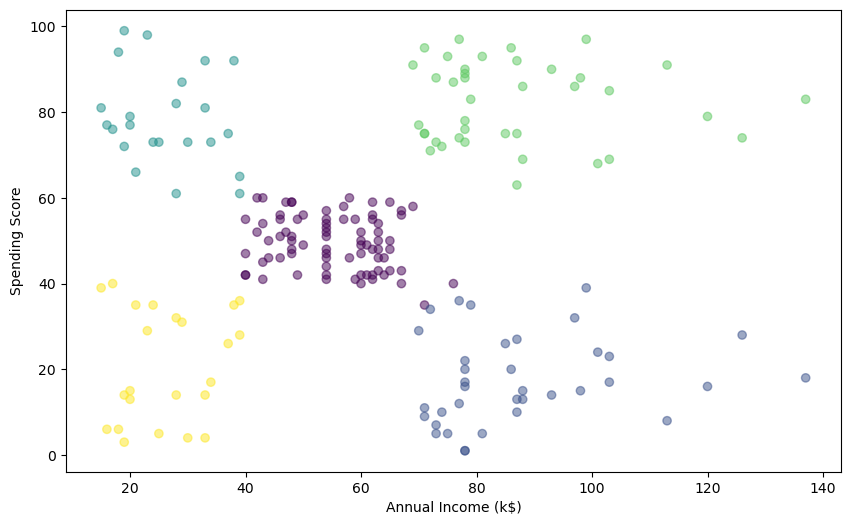

In [32]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 1], X[:, 2], c=labels.astype('float'), alpha=0.5)
plt.xlabel('Annual Income (k$)', fontsize=10)
plt.ylabel('Spending Score', fontsize=10)
plt.show()


### Age and Spending Score

In [33]:
wcss_2 = []
for i in range(1, 12):
    k_means = KMeans(n_clusters = i)
    k_means.fit(X_frame[[0, 2]])
    wcss_iter = k_means.inertia_
    wcss_2.append(wcss_iter)

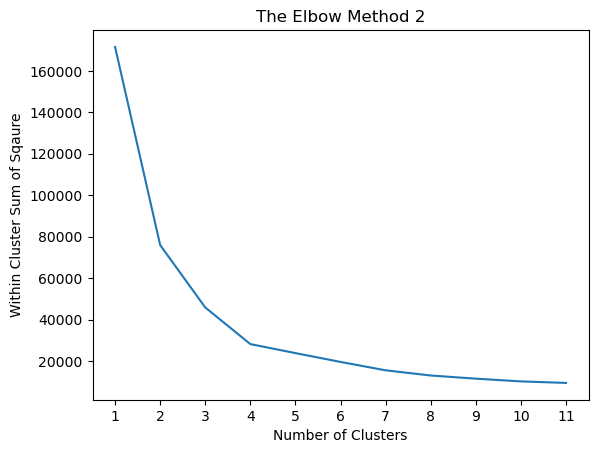

In [34]:
num_clusters_2 = range(1, 12)
plt.plot(num_clusters_2, wcss_2)
plt.xticks(num_clusters_2)
plt.xlabel("Number of Clusters"), plt.ylabel("Within Cluster Sum of Sqaure")
plt.title("The Elbow Method 2")
plt.show()

In [35]:
clusterNum = 4
k_means_2 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_2.fit(X)

KMeans(n_clusters=4, n_init=12)

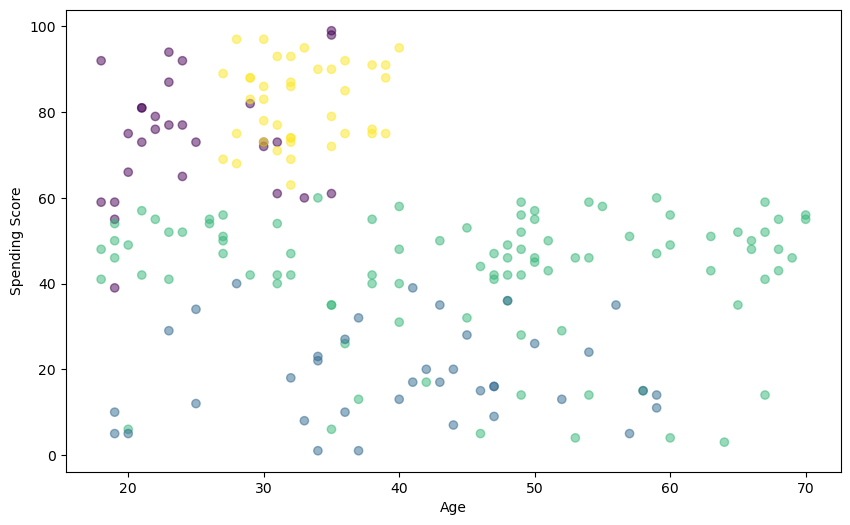

In [36]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 2], c=k_means_2.labels_.astype('float'), alpha=0.5)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Spending Score', fontsize=10)
plt.show()


### Gender

In [37]:
wcss_3 = []
for i in range(1, 12):
    k_means = KMeans(n_clusters = i)
    k_means.fit(X_frame[[3, 2]])
    wcss_iter = k_means.inertia_
    wcss_3.append(wcss_iter)

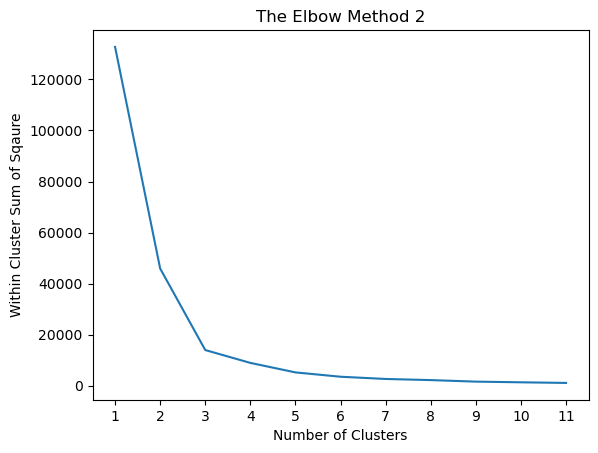

In [38]:
num_clusters_3 = range(1, 12)
plt.plot(num_clusters_3, wcss_3)
plt.xticks(num_clusters_3)
plt.xlabel("Number of Clusters"), plt.ylabel("Within Cluster Sum of Sqaure")
plt.title("The Elbow Method 2")
plt.show()

In [39]:
clusterNum = 3
k_means_3 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_3.fit(X)

KMeans(n_clusters=3, n_init=12)

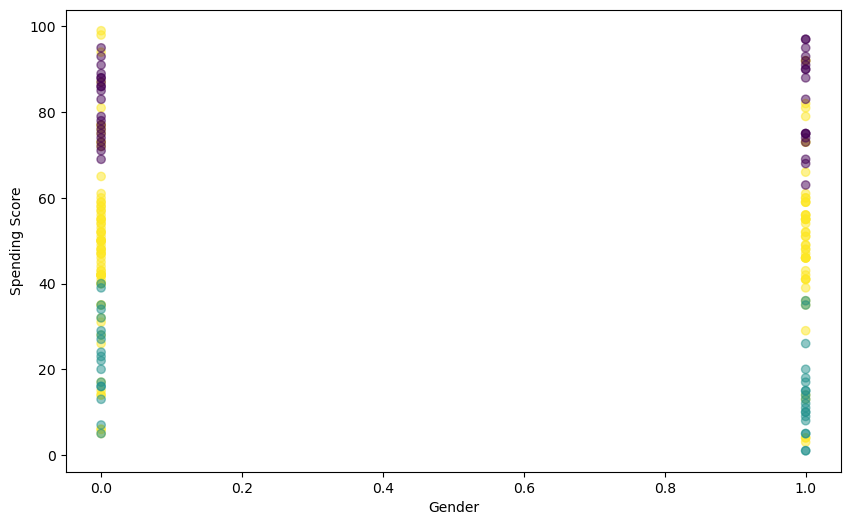

In [40]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 3], X[:, 2], c=k_means_3.labels_.astype('float'), alpha=0.5)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Spending Score', fontsize=10)
plt.show()


### Gender, Income, Age, and Spending Score

In [41]:
wcss_4 = []
for i in range(1, 12):
    k_means = KMeans(n_clusters = i)
    k_means.fit(X)
    wcss_iter = k_means.inertia_
    wcss_4.append(wcss_iter)

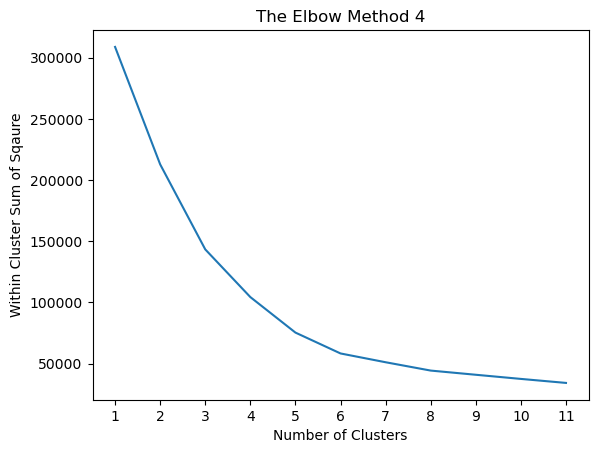

In [42]:
num_clusters_4 = range(1, 12)
plt.plot(num_clusters_4, wcss_4)
plt.xticks(num_clusters_4)
plt.xlabel("Number of Clusters"), plt.ylabel("Within Cluster Sum of Sqaure")
plt.title("The Elbow Method 4")
plt.show()

In [43]:
clusterNum = 6
k_means_4 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means_4.fit(X)

KMeans(n_clusters=6, n_init=12)

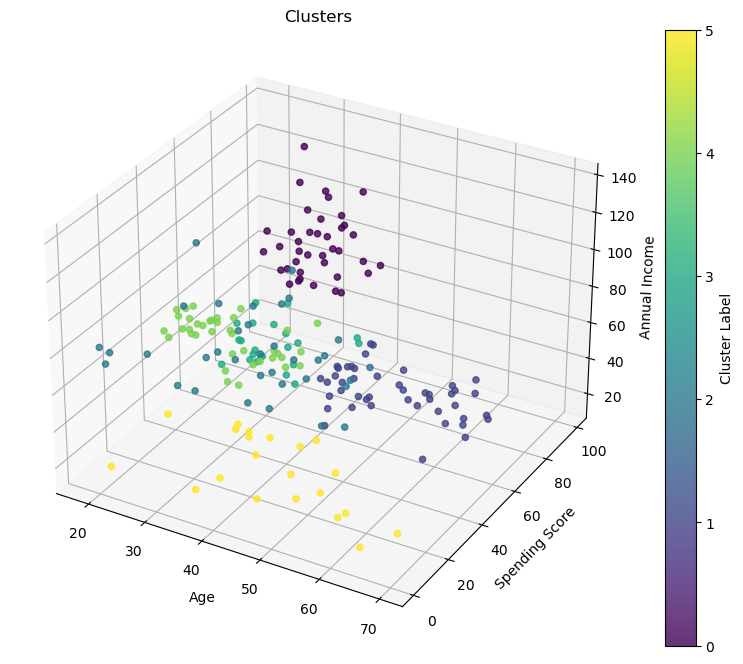

In [44]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 2], X[:, 1],
                     c=k_means_4.labels_, s=20, alpha=0.8, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')
cbar = fig.colorbar(scatter, ax=ax, label='Cluster Label')

plt.title('Clusters')
plt.show()
